In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import pandas_datareader as pdr
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

C:\Users\No\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [22]:
df = pd.read_excel('Qdata1.xls', index_col=1)
df.head()

,date,tb1,tb3,tb5,tb10,cbaa,cbbb,g_kospi,cpi,impi,...,bcycle1,bcycle2,manu,urate,eapr,empr,hp,lf,m1,m2
call,,,,,,,,,,,,,,,,,,,,,
5.0,2001 1,-1.13,-1.56,-1.44,-1.07,-1.18,0.04,6.215426,1.8,3.6,...,96.800000,99.966667,75.6,4.6,60.9,58.1,0.733333,0.300000,1.666667,0.633333
5.0,2001 2,0.24,0.61,0.81,0.80,0.38,0.32,0.672410,1.2,1.3,...,97.200000,99.633333,75.6,3.9,61.5,59.1,1.066667,0.133333,1.600000,0.933333
4.0,2001 3,-0.94,-1.10,-1.33,-1.05,-1.01,-1.34,-6.439051,0.6,-4.2,...,96.900000,99.133333,75.0,3.7,61.6,59.3,1.466667,2.166667,3.233333,1.233333
4.0,2001 4,-0.21,0.08,0.57,0.37,0.13,0.10,9.852580,-0.3,-6.8,...,98.233333,99.866667,73.4,3.7,61.9,59.6,0.333333,1.966667,1.866667,-0.066667
4.0,2002 1,0.27,0.76,0.66,0.28,0.26,0.28,28.176344,1.0,1.2,...,102.333333,100.733333,77.3,3.5,62.1,59.9,1.666667,1.300000,2.633333,1.500000


In [23]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.head()

,tb1,tb3,tb5,tb10,cbaa,cbbb,g_kospi,cpi,impi,ppi,...,bcycle1,bcycle2,manu,urate,eapr,empr,hp,lf,m1,m2
date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,-1.13,-1.56,-1.44,-1.07,-1.18,0.04,6.215426,1.8,3.6,0.3,...,96.800000,99.966667,75.6,4.6,60.9,58.1,0.733333,0.300000,1.666667,0.633333
2001-02-01,0.24,0.61,0.81,0.80,0.38,0.32,0.672410,1.2,1.3,-0.2,...,97.200000,99.633333,75.6,3.9,61.5,59.1,1.066667,0.133333,1.600000,0.933333
2001-03-01,-0.94,-1.10,-1.33,-1.05,-1.01,-1.34,-6.439051,0.6,-4.2,-0.8,...,96.900000,99.133333,75.0,3.7,61.6,59.3,1.466667,2.166667,3.233333,1.233333
2001-04-01,-0.21,0.08,0.57,0.37,0.13,0.10,9.852580,-0.3,-6.8,-1.3,...,98.233333,99.866667,73.4,3.7,61.9,59.6,0.333333,1.966667,1.866667,-0.066667
2002-01-01,0.27,0.76,0.66,0.28,0.26,0.28,28.176344,1.0,1.2,0.2,...,102.333333,100.733333,77.3,3.5,62.1,59.9,1.666667,1.300000,2.633333,1.500000


## 시계열 데이터 주의할 점
1. 추세 --> 제거해야 된다. 차분시켜라.
로그 안취하는거 차분시키면 '변동'이고, 금액같이 로그로 되어있는 것을 차분시키면 '증가율'로 된다.

In [52]:
x = ['g_kospi', 'growth', 'tb3']
X = df[x]
y = df.C_p
X = sm.add_constant(X)
results_cons = sm.OLS(y, X).fit()
results_cons.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    C_p   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 28 May 2020   Prob (F-statistic):           2.55e-10
Time:                        15:32:53   Log-Likelihood:                -103.00
No. Observations:                  77   AIC:                             214.0
Df Residuals:                      73   BIC:                             223.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1515      0.175     -0.866      0.389      -0.500       0.197
g_kospi        0.0205      0.016      1.258      0.212      -0.012       0.053
growth         0.8478      0.151      5.616      0.000       0.547       1.149
tb3            0.2386      0.316      0.755      0.452      -0.391       0.868
==============================================================================
Omnibus:                       51.865   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.783
Skew:                          -1.789   Prob(JB):                     1.01e-79
Kurtosis:                      13.029   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_hat = 

NameError: name 'y_hat' is not defined

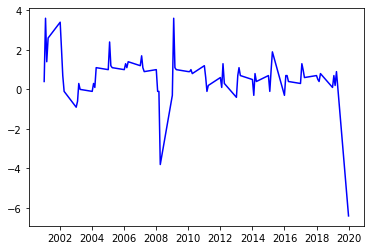

In [53]:
plt.plot(y, c='b', label='consumption growth')
plt.plot(y_hat, c='r', label='fitted value')